In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
path=r'‪C:\Users\User\Downloads\lgd_data.xlsx'
data=pd.read_excel(path[1:])
data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
0,238203,729,36,3.81,47603,88,24,4,2,Rent,Home Improvement,Adjustable Rate,South,0.010000
1,170008,745,36,6.68,67474,71,43,4,2,Mortgage,Auto Loan,Adjustable Rate,South,0.757182
2,198937,681,24,8.38,77036,74,46,6,1,Own,Personal Loan,Fixed Rate,West,0.575147
3,262045,684,48,5.45,55083,85,24,0,0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998
4,243378,758,72,6.64,70148,78,40,5,0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140,723,24,5.62,71515,91,17,3,0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995
39996,250556,777,72,6.16,45326,88,34,3,0,Rent,Auto Loan,Fixed Rate,West,0.834943
39997,234493,827,60,5.97,48418,78,24,7,1,Rent,Debt Consolidation,Fixed Rate,West,0.897571
39998,159998,698,36,8.65,85987,73,37,6,0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537


In [3]:
data.describe(include='all')

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%
count,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000,40000,40000,40000,40000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,2,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rent,Auto Loan,Adjustable Rate,North,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13420,8163,20161,10165,NaN
mean,149811.070400,700.667300,47.91060,6.499560,60069.306750,79.982225,30.08045,5.002275,0.998925,NaN,NaN,NaN,NaN,0.320288
std,49836.964295,49.974161,17.00847,1.504729,19926.497499,9.986641,9.98215,2.015557,0.818530,NaN,NaN,NaN,NaN,0.341183
min,-82998.000000,505.000000,24.00000,0.380000,-17513.000000,37.000000,-13.00000,-5.000000,0.000000,NaN,NaN,NaN,NaN,0.009717
25%,116398.000000,667.000000,36.00000,5.480000,46567.500000,73.000000,23.00000,4.000000,0.000000,NaN,NaN,NaN,NaN,0.010001
50%,149822.500000,701.000000,48.00000,6.490000,60058.000000,80.000000,30.00000,5.000000,1.000000,NaN,NaN,NaN,NaN,0.197368
75%,183328.000000,734.000000,60.00000,7.520000,73416.750000,87.000000,37.00000,6.000000,2.000000,NaN,NaN,NaN,NaN,0.572629


In [4]:
data.isnull().sum()

Exposure Amount ($)           0
Credit Score                  0
Loan Term (Months)            0
Interest Rate (%)             0
Income ($)                    0
Loan to Value Ratio (%)       0
Debt to Income Ratio (%)      0
Employment History (Years)    0
Previous Defaults             0
Home Ownership                0
Loan Purpose                  0
Loan Type                     0
Region                        0
LGD%                          0
dtype: int64

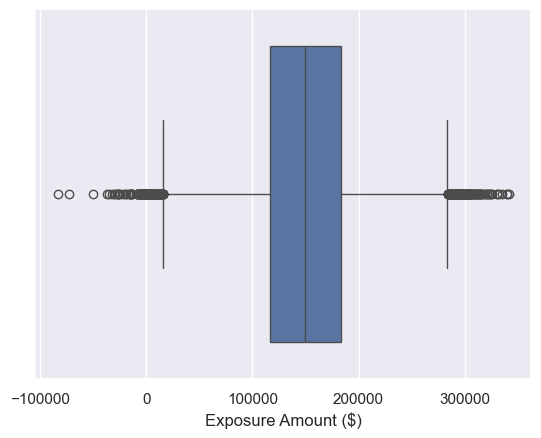

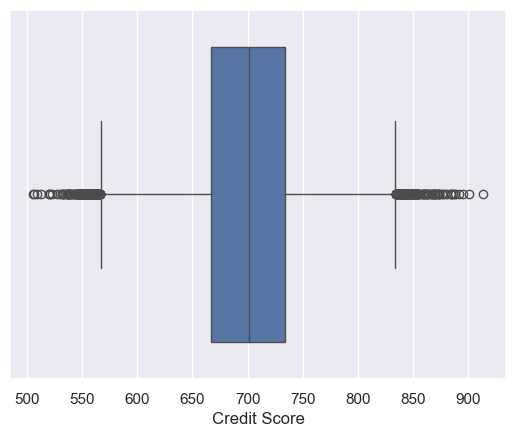

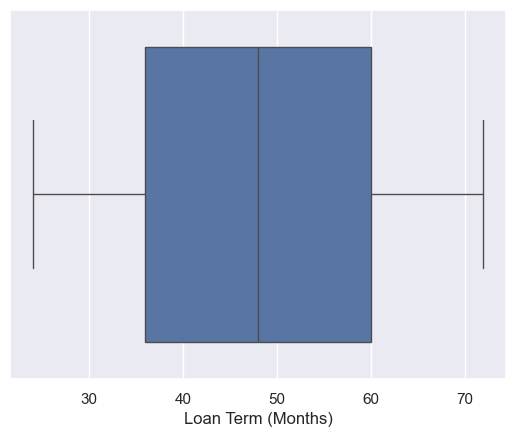

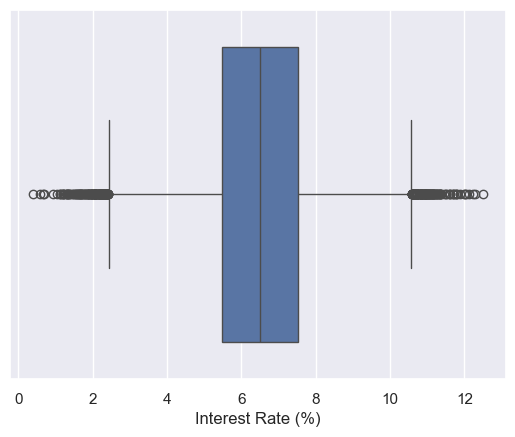

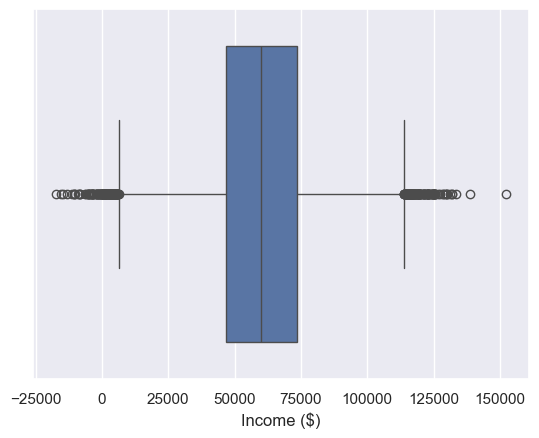

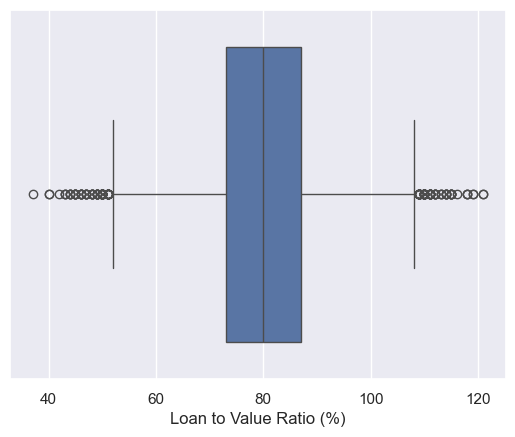

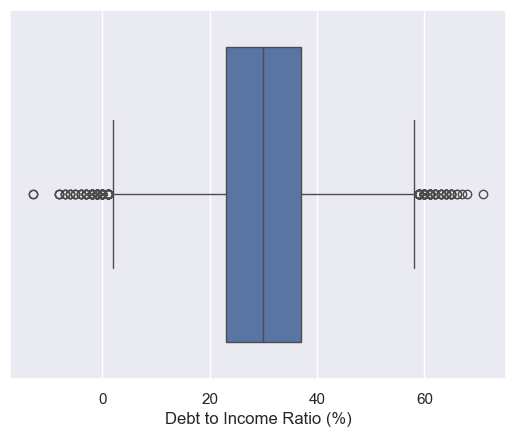

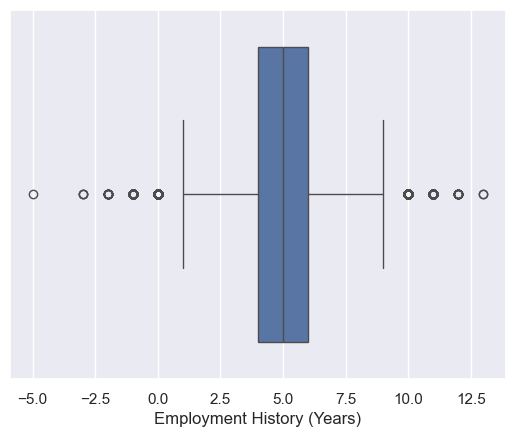

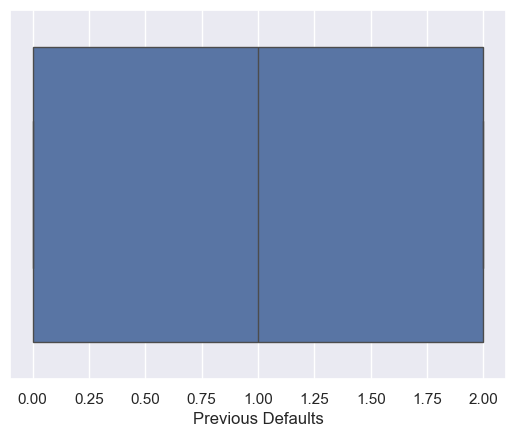

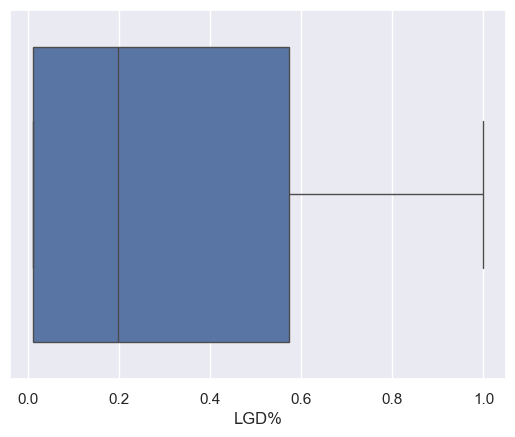

In [5]:
for i in data.columns:
    if data[i].dtypes!=object:
        sns.boxplot(data=data,x=data[i])
        plt.show()

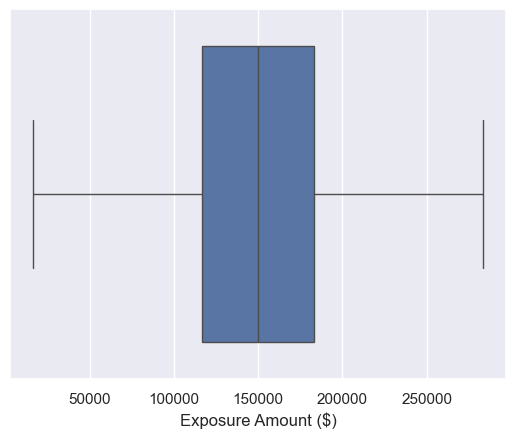

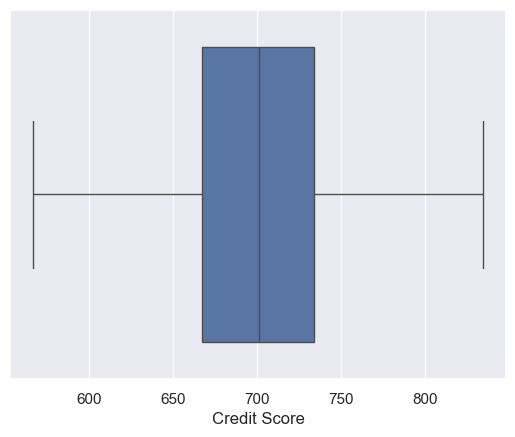

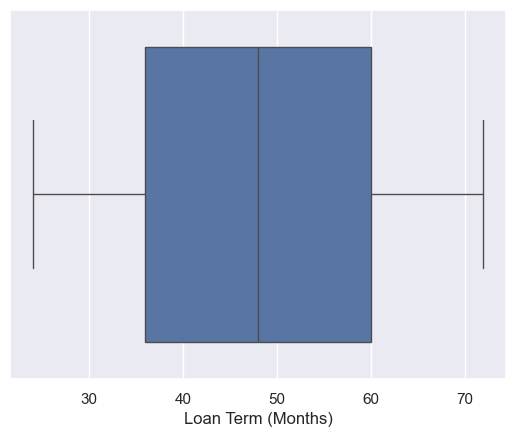

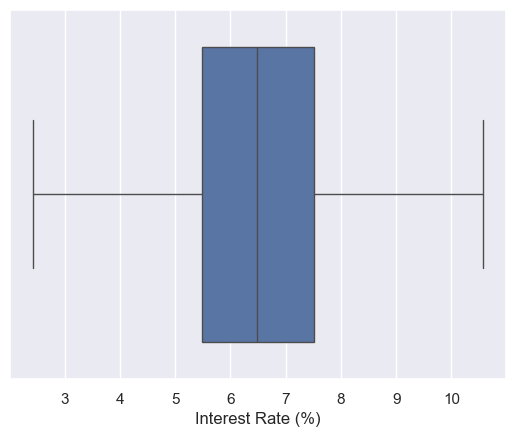

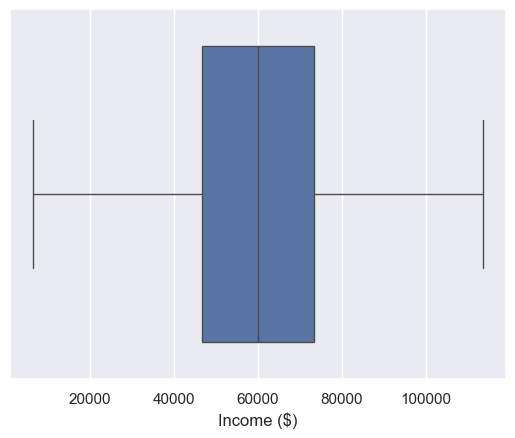

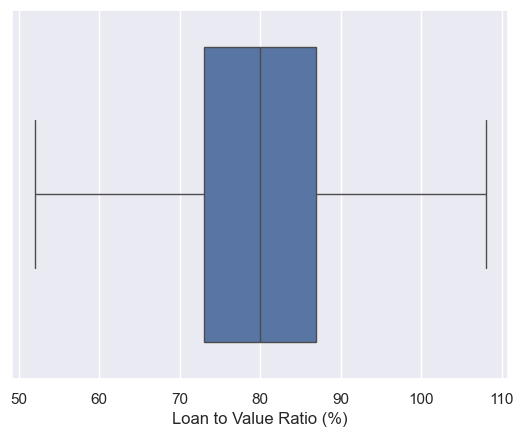

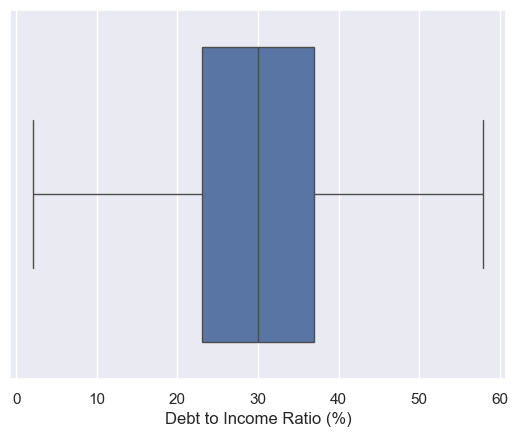

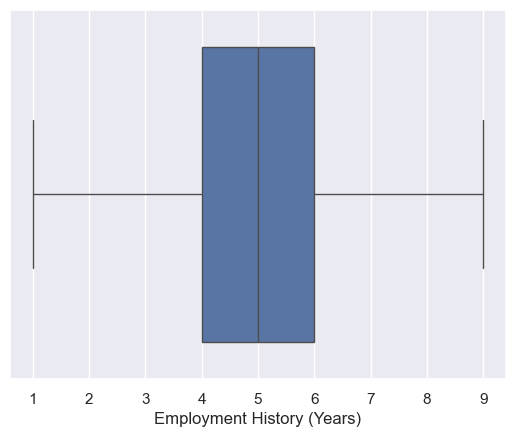

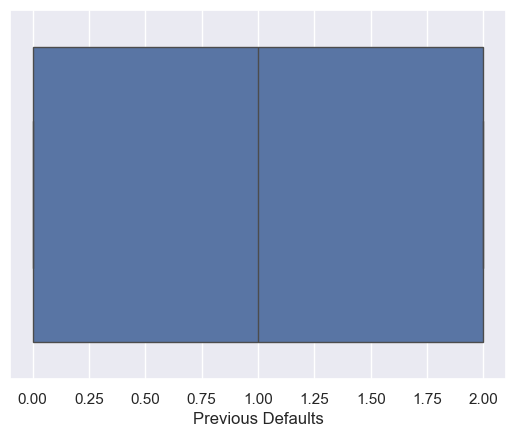

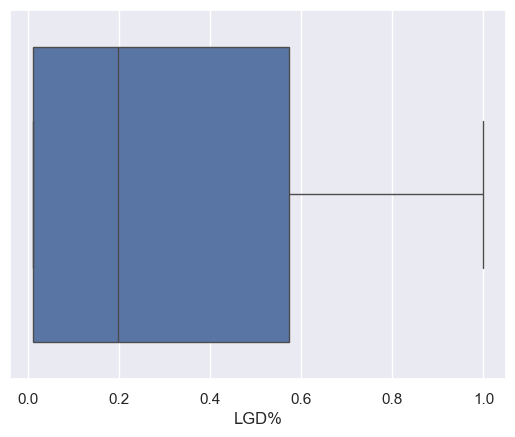

In [6]:
q1=data.quantile(0.25,numeric_only=True)
q3=data.quantile(0.75,numeric_only=True)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

for i in data.columns:
    if data[i].dtypes!=object:
        data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
        data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [7]:
data['Income_mean_by_Region']=data.groupby('Region')['Income ($)'].transform('mean')
data['Previous_Defaults_mean_by_Credit_Score']=data.groupby('Credit Score')['Previous Defaults'].transform('mean')
data

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score
0,238203.0,729.0,36.0,3.81,47603.0,88.0,24.0,4.0,2.0,Rent,Home Improvement,Adjustable Rate,South,0.010000,60082.674340,0.938525
1,170008.0,745.0,36.0,6.68,67474.0,71.0,43.0,4.0,2.0,Mortgage,Auto Loan,Adjustable Rate,South,0.757182,60082.674340,1.022321
2,198937.0,681.0,24.0,8.38,77036.0,74.0,46.0,6.0,1.0,Own,Personal Loan,Fixed Rate,West,0.575147,60307.337702,1.030303
3,262045.0,684.0,48.0,5.45,55083.0,85.0,24.0,1.0,0.0,Mortgage,Home Purchase,Adjustable Rate,West,0.009998,60307.337702,0.985866
4,243378.0,758.0,72.0,6.64,70148.0,78.0,40.0,5.0,0.0,Mortgage,Debt Consolidation,Fixed Rate,North,1.000000,59985.178837,1.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,723.0,24.0,5.62,71515.0,91.0,17.0,3.0,0.0,Mortgage,Debt Consolidation,Adjustable Rate,North,0.009995,59985.178837,0.986395
39996,250556.0,777.0,72.0,6.16,45326.0,88.0,34.0,3.0,0.0,Rent,Auto Loan,Fixed Rate,West,0.834943,60307.337702,1.033333
39997,234493.0,827.0,60.0,5.97,48418.0,78.0,24.0,7.0,1.0,Rent,Debt Consolidation,Fixed Rate,West,0.897571,60307.337702,1.000000
39998,159998.0,698.0,36.0,8.65,85987.0,73.0,37.0,6.0,0.0,Mortgage,Personal Loan,Adjustable Rate,West,0.445537,60307.337702,0.963087


In [8]:
from scipy import stats

for i in data.columns:
    if data[i].dtype in ['int64','float64']:
        kstest_statistic,kstest_p_value=stats.kstest(data[i],'norm')
        print(f"Column:{i}")
        print(f'p-value {kstest_p_value}')
        if kstest_p_value>0.05:
            print('Normal distributed')
        else:
            print('Not normal distributed')

Column:Exposure Amount ($)
p-value 0.0
Not normal distributed
Column:Credit Score
p-value 0.0
Not normal distributed
Column:Loan Term (Months)
p-value 0.0
Not normal distributed
Column:Interest Rate (%)
p-value 0.0
Not normal distributed
Column:Income ($)
p-value 0.0
Not normal distributed
Column:Loan to Value Ratio (%)
p-value 0.0
Not normal distributed
Column:Debt to Income Ratio (%)
p-value 0.0
Not normal distributed
Column:Employment History (Years)
p-value 0.0
Not normal distributed
Column:Previous Defaults
p-value 0.0
Not normal distributed
Column:LGD%
p-value 0.0
Not normal distributed
Column:Income_mean_by_Region
p-value 0.0
Not normal distributed
Column:Previous_Defaults_mean_by_Credit_Score
p-value 0.0
Not normal distributed


In [9]:
data.corr(method='spearman',numeric_only=True)

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score
Exposure Amount ($),1.000000,0.000537,-0.004889,0.007016,-0.001408,0.001700,0.001135,0.001011,0.003210,0.108719,0.000093,0.002993
Credit Score,0.000537,1.000000,0.005094,0.002438,0.003012,0.003004,-0.005423,0.002966,0.003455,0.489755,0.001896,0.010395
Loan Term (Months),-0.004889,0.005094,1.000000,-0.005708,-0.000408,0.000966,-0.002118,0.000815,-0.002210,0.337089,-0.005692,-0.004345
Interest Rate (%),0.007016,0.002438,-0.005708,1.000000,0.001770,0.000017,-0.000638,0.004275,0.003819,0.165559,-0.000407,0.002013
Income ($),-0.001408,0.003012,-0.000408,0.001770,1.000000,-0.008877,0.010637,-0.004133,-0.000187,0.405091,0.007087,0.000476
Loan to Value Ratio (%),0.001700,0.003004,0.000966,0.000017,-0.008877,1.000000,-0.000482,-0.003582,-0.000311,0.240004,0.003880,-0.008032
Debt to Income Ratio (%),0.001135,-0.005423,-0.002118,-0.000638,0.010637,-0.000482,1.000000,-0.001078,-0.003350,0.319163,0.002722,0.000826
Employment History (Years),0.001011,0.002966,0.000815,0.004275,-0.004133,-0.003582,-0.001078,1.000000,0.004300,0.160256,0.002791,-0.003018
Previous Defaults,0.003210,0.003455,-0.002210,0.003819,-0.000187,-0.000311,-0.003350,0.004300,1.000000,0.253319,-0.000845,0.076758
LGD%,0.108719,0.489755,0.337089,0.165559,0.405091,0.240004,0.319163,0.160256,0.253319,1.000000,0.005827,0.028162


In [10]:
def target_correlation(data,target,threshold=0.1):
    corr=data.corr(method='spearman',numeric_only=True)[target].drop(target)
    corr=corr[corr.abs()>=threshold]
    corr=corr.reindex(corr.abs().sort_values(ascending=False).index)
    return corr.reset_index().rename(
        columns={'index':'Variable',target:"Correlation with target"}
    )
target_result=target_correlation(data,'LGD%')
target_result

,Variable,Correlation with target
0,Credit Score,0.489755
1,Income ($),0.405091
2,Loan Term (Months),0.337089
3,Debt to Income Ratio (%),0.319163
4,Previous Defaults,0.253319
5,Loan to Value Ratio (%),0.240004
6,Interest Rate (%),0.165559
7,Employment History (Years),0.160256
8,Exposure Amount ($),0.108719


In [11]:
def intercorrelation(data,target,threshold=0.6):
    corr_matrix=data.drop(columns=[target]).corr(method='spearman',numeric_only=True)
    corr_mask=np.triu(np.ones(corr_matrix.shape),k=1).astype(bool)
    high_corr=corr_matrix.where(corr_mask).stack().reset_index()
    high_corr.columns=['Variable N1','Variable N2','Correlation']
    high_corr=high_corr[high_corr['Correlation'].abs()>=threshold]
    return high_corr.reset_index(drop=True)

result_intercorrelation=intercorrelation(data,'LGD%')
result_intercorrelation

,Variable N1,Variable N2,Correlation


In [12]:
target_result.Variable.tolist()

['Credit Score',
 'Income ($)',
 'Loan Term (Months)',
 'Debt to Income Ratio (%)',
 'Previous Defaults',
 'Loan to Value Ratio (%)',
 'Interest Rate (%)',
 'Employment History (Years)',
 'Exposure Amount ($)']

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data,variables):
     vif_data=data[variables]
     vif_values=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
     vif_result=pd.DataFrame({"VIF":vif_values,"Features":variables})
     return vif_result
vif_result=calculate_vif(data,[
   
 'Income ($)',
 'Loan Term (Months)',
 'Debt to Income Ratio (%)',
 'Previous Defaults',
 'Employment History (Years)',
 'Exposure Amount ($)'
])
vif_result

,VIF,Features
0,8.120835,Income ($)
1,7.324425,Loan Term (Months)
2,8.116730,Debt to Income Ratio (%)
3,2.405987,Previous Defaults
4,6.504986,Employment History (Years)
5,8.070681,Exposure Amount ($)


In [14]:
categorical=[]
numerical=[]
for column in data.columns:
    if data[column].dtype==object:
        categorical.append(column)
    else:
        numerical.append(column)

In [15]:
numerical

['Exposure Amount ($)',
 'Credit Score',
 'Loan Term (Months)',
 'Interest Rate (%)',
 'Income ($)',
 'Loan to Value Ratio (%)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults',
 'LGD%',
 'Income_mean_by_Region',
 'Previous_Defaults_mean_by_Credit_Score']

In [16]:
categorical

['Home Ownership', 'Loan Purpose', 'Loan Type', 'Region']

In [17]:
data1=data[['Home Ownership', 'Loan Purpose', 'Loan Type', 'Region','Exposure Amount ($)',
 
 'Loan Term (Months)',
 'Income ($)',
 'Debt to Income Ratio (%)',
 'Employment History (Years)',
 'Previous Defaults',
 'LGD%',
 'Income_mean_by_Region',
 'Previous_Defaults_mean_by_Credit_Score']]
data1

,Home Ownership,Loan Purpose,Loan Type,Region,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score
0,Rent,Home Improvement,Adjustable Rate,South,238203.0,36.0,47603.0,24.0,4.0,2.0,0.010000,60082.674340,0.938525
1,Mortgage,Auto Loan,Adjustable Rate,South,170008.0,36.0,67474.0,43.0,4.0,2.0,0.757182,60082.674340,1.022321
2,Own,Personal Loan,Fixed Rate,West,198937.0,24.0,77036.0,46.0,6.0,1.0,0.575147,60307.337702,1.030303
3,Mortgage,Home Purchase,Adjustable Rate,West,262045.0,48.0,55083.0,24.0,1.0,0.0,0.009998,60307.337702,0.985866
4,Mortgage,Debt Consolidation,Fixed Rate,North,243378.0,72.0,70148.0,40.0,5.0,0.0,1.000000,59985.178837,1.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Mortgage,Debt Consolidation,Adjustable Rate,North,77140.0,24.0,71515.0,17.0,3.0,0.0,0.009995,59985.178837,0.986395
39996,Rent,Auto Loan,Fixed Rate,West,250556.0,72.0,45326.0,34.0,3.0,0.0,0.834943,60307.337702,1.033333
39997,Rent,Debt Consolidation,Fixed Rate,West,234493.0,60.0,48418.0,24.0,7.0,1.0,0.897571,60307.337702,1.000000
39998,Mortgage,Personal Loan,Adjustable Rate,West,159998.0,36.0,85987.0,37.0,6.0,0.0,0.445537,60307.337702,0.963087


In [18]:
data=pd.get_dummies(data1,drop_first=True,dtype=int)
data

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,LGD%,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,238203.0,36.0,47603.0,24.0,4.0,2.0,0.010000,60082.674340,0.938525,0,1,0,1,0,0,0,0,1,0
1,170008.0,36.0,67474.0,43.0,4.0,2.0,0.757182,60082.674340,1.022321,0,0,0,0,0,0,0,0,1,0
2,198937.0,24.0,77036.0,46.0,6.0,1.0,0.575147,60307.337702,1.030303,1,0,0,0,0,1,1,0,0,1
3,262045.0,48.0,55083.0,24.0,1.0,0.0,0.009998,60307.337702,0.985866,0,0,0,0,1,0,0,0,0,1
4,243378.0,72.0,70148.0,40.0,5.0,0.0,1.000000,59985.178837,1.046512,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,77140.0,24.0,71515.0,17.0,3.0,0.0,0.009995,59985.178837,0.986395,0,0,1,0,0,0,0,1,0,0
39996,250556.0,72.0,45326.0,34.0,3.0,0.0,0.834943,60307.337702,1.033333,0,1,0,0,0,0,1,0,0,1
39997,234493.0,60.0,48418.0,24.0,7.0,1.0,0.897571,60307.337702,1.000000,0,1,1,0,0,0,1,0,0,1
39998,159998.0,36.0,85987.0,37.0,6.0,0.0,0.445537,60307.337702,0.963087,0,0,0,0,0,1,0,0,0,1


In [19]:
data_dummies = pd.get_dummies(data, drop_first=True, dtype=int)

In [20]:
targets=data['LGD%']
inputs=data.drop(['LGD%'],axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

,copy,True
,with_mean,True
,with_std,True


In [22]:
inputs_scaled=scaler.transform(inputs)
data_scaled=pd.DataFrame(inputs_scaled,columns=inputs.columns)
data_scaled

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,1.786404,-0.700283,-0.629277,-0.612479,-0.517597,1.223032,0.097178,-0.869497,-0.709601,1.407347,-0.501484,1.988973,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
1,0.408114,-0.700283,0.373902,1.300527,-0.517597,1.223032,0.097178,0.336804,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,1.736798,-0.578274
2,0.992798,-1.405823,0.856635,1.602580,0.513114,0.001313,1.559518,0.451704,1.409243,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,1.008083,-0.583701,-0.575772,1.729284
3,2.268275,0.005256,-0.251653,-0.612479,-2.063665,-1.220405,1.559518,-0.187995,-0.709601,-0.710557,-0.501484,-0.502772,2.027763,-0.496208,-0.991982,-0.583701,-0.575772,1.729284
4,1.890996,1.416336,0.508897,0.998473,-0.002242,-1.220405,-0.537423,0.685036,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,1.008083,1.713205,-0.575772,-0.578274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.468843,-1.405823,0.577910,-1.317271,-1.032953,-1.220405,-0.537423,-0.180383,-0.709601,-0.710557,1.994082,-0.502772,-0.493154,-0.496208,-0.991982,1.713205,-0.575772,-0.578274
39996,2.036071,1.416336,-0.744231,0.394366,-1.032953,-1.220405,1.559518,0.495327,-0.709601,1.407347,-0.501484,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39997,1.711421,0.710796,-0.588132,-0.612479,1.028470,0.001313,1.559518,0.015475,-0.709601,1.407347,1.994082,-0.502772,-0.493154,-0.496208,1.008083,-0.583701,-0.575772,1.729284
39998,0.205801,-0.700283,1.308522,0.696420,0.513114,-1.220405,1.559518,-0.515904,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,2.015284,-0.991982,-0.583701,-0.575772,1.729284


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_scaled,targets,test_size=0.2,random_state=35)

In [24]:
reg=LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred=reg.predict(X_test)
y_pred_train=reg.predict(X_train)

In [26]:
from sklearn import metrics
mae_test=metrics.mean_absolute_error(y_test,y_pred)
mse_test=metrics.mean_squared_error(y_test,y_pred)
rmse_test=np.sqrt(mse_test)
r2_test=metrics.r2_score(y_test,y_pred)


mae_train=metrics.mean_absolute_error(y_train,y_pred_train)
mse_train=metrics.mean_squared_error(y_train,y_pred_train)
rmse_train=np.sqrt(mse_train)
r2_train=metrics.r2_score(y_train,y_pred_train)

def adjusted_r2(r2,n,k):
    return 1-(1-r2)*(n-1)/(n-k-1)

n_train=len(y_train)
n_test=len(y_test)
k=X_train.shape[1]
adjusted_r2_train=adjusted_r2(r2_train,n_train,k)
adjusted_r2_test=adjusted_r2(r2_test,n_test,k)

result={
    'Metric':['MAE','MSE','RMSE','R2','Adjusted R2'],
    'Train':[mae_train,mse_train,rmse_train,r2_train,adjusted_r2_train],
    'Test':[mae_test,mse_test,rmse_test,r2_test,adjusted_r2_test]
    
}
result_df=pd.DataFrame(result)
result_df

,Metric,Train,Test
0,MAE,0.196768,0.198623
1,MSE,0.058963,0.060410
2,RMSE,0.242824,0.245784
3,R2,0.492322,0.485593
4,Adjusted R2,0.492037,0.484432


In [27]:
result=[]
for i in X_train.columns:
    X_train_single_var=X_train[[i]]
    X_test_single_var=X_test[[i]]

    reg.fit(X_train_single_var,y_train)
    y_pred_train_single_var=reg.predict(X_train_single_var)
    train_r2=metrics.r2_score(y_train,y_pred_train_single_var)
    y_pred_test_single_var=reg.predict(X_test_single_var)
    test_r2=metrics.r2_score(y_test,y_pred_test_single_var)
    result.append({'Variable':i,'Train R2':train_r2,'Test R2':test_r2})
result_df=pd.DataFrame(result)
result_df_sorted=result_df.sort_values(by='Test R2',ascending=False)
result_df_sorted

,Variable,Train R2,Test R2
2,Income ($),1.699191e-01,0.172815
3,Debt to Income Ratio (%),1.070780e-01,0.106545
1,Loan Term (Months),1.121456e-01,0.105324
5,Previous Defaults,6.321383e-02,0.065758
4,Employment History (Years),2.652400e-02,0.027756
0,Exposure Amount ($),1.217063e-02,0.015022
7,Previous_Defaults_mean_by_Credit_Score,2.197870e-03,0.001791
13,Loan Purpose_Personal Loan,3.792241e-06,-0.000022
6,Income_mean_by_Region,3.782295e-05,-0.000030
10,Loan Purpose_Debt Consolidation,2.772633e-06,-0.000034


In [28]:
inputs=data_scaled[['Employment History (Years)','Previous Defaults','Loan Term (Months)','Debt to Income Ratio (%)','Income ($)']]
from sklearn.model_selection import train_test_split
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(inputs, targets, test_size=0.2, random_state=35)

In [29]:
reg=LinearRegression()
reg.fit(X_train_uni,y_train_uni)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred_uni=reg.predict(X_test_uni)
y_pred_train_uni=reg.predict(X_train_uni)


In [31]:
mae_test=metrics.mean_absolute_error(y_test_uni,y_pred_uni)
mse_test=metrics.mean_squared_error(y_test_uni,y_pred_uni)
rmse_test=np.sqrt(mse_test)
r2_test=metrics.r2_score(y_test_uni,y_pred_uni)

mae_train=metrics.mean_absolute_error(y_train_uni,y_pred_train_uni)
mse_train=metrics.mean_squared_error(y_train_uni,y_pred_train_uni)
rmse_train=np.sqrt(mse_train)
r2_train=metrics.r2_score(y_train_uni,y_pred_train_uni)

def adjusted_r2(r2,n,k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)
n_train=len(y_train_uni)
n_test=len(y_test_uni)
k=X_train_uni.shape[1]

adj_r2_train=adjusted_r2(r2_train,n_train,k)
adj_r2_test=adjusted_r2(r2_test,n_test,k)

result_dict={
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}
result_df=pd.DataFrame(result_dict)
result_df

,Metric,Train,Test
0,MAE,0.199244,0.201781
1,MSE,0.060464,0.062219
2,RMSE,0.245894,0.249437
3,R2,0.479401,0.470188


# Deployment

In [32]:
path=r'‪C:\Users\User\Downloads\lgd_data_deploy.xlsx'
df1=pd.read_excel(path[1:])
df1

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region
0,153539,715,36,6.85,57712,92,23,6,1,Mortgage,Home Improvement,Adjustable Rate,West
1,137842,713,36,6.65,37490,83,41,7,0,Mortgage,Debt Consolidation,Fixed Rate,East
2,187289,606,72,5.00,35857,79,46,7,1,Mortgage,Home Improvement,Adjustable Rate,East
3,98051,817,72,6.01,37531,91,20,4,2,Mortgage,Home Improvement,Fixed Rate,East
4,120672,659,36,5.88,84892,93,28,2,0,Rent,Debt Consolidation,Adjustable Rate,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,83740,610,24,5.37,66358,69,23,4,1,Mortgage,Debt Consolidation,Adjustable Rate,South
396,129005,635,36,7.51,71919,84,38,5,1,Own,Debt Consolidation,Adjustable Rate,South
397,129767,760,72,6.93,28667,98,42,4,0,Rent,Debt Consolidation,Adjustable Rate,West
398,196097,695,24,4.12,55885,69,38,5,0,Mortgage,Home Purchase,Adjustable Rate,West


In [33]:
df1["Previous_Defaults_mean_by_Credit_Score"] = df1.groupby("Credit Score")["Previous Defaults"].transform("mean")
df1["Income_mean_by_Region"]  = df1.groupby("Region")["Income ($)"].transform("mean")

df1

,Exposure Amount ($),Credit Score,Loan Term (Months),Interest Rate (%),Income ($),Loan to Value Ratio (%),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Home Ownership,Loan Purpose,Loan Type,Region,Previous_Defaults_mean_by_Credit_Score,Income_mean_by_Region
0,153539,715,36,6.85,57712,92,23,6,1,Mortgage,Home Improvement,Adjustable Rate,West,0.250000,60445.376238
1,137842,713,36,6.65,37490,83,41,7,0,Mortgage,Debt Consolidation,Fixed Rate,East,0.666667,59553.853933
2,187289,606,72,5.00,35857,79,46,7,1,Mortgage,Home Improvement,Adjustable Rate,East,1.000000,59553.853933
3,98051,817,72,6.01,37531,91,20,4,2,Mortgage,Home Improvement,Fixed Rate,East,2.000000,59553.853933
4,120672,659,36,5.88,84892,93,28,2,0,Rent,Debt Consolidation,Adjustable Rate,East,0.000000,59553.853933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,83740,610,24,5.37,66358,69,23,4,1,Mortgage,Debt Consolidation,Adjustable Rate,South,0.500000,59857.018182
396,129005,635,36,7.51,71919,84,38,5,1,Own,Debt Consolidation,Adjustable Rate,South,1.333333,59857.018182
397,129767,760,72,6.93,28667,98,42,4,0,Rent,Debt Consolidation,Adjustable Rate,West,0.000000,60445.376238
398,196097,695,24,4.12,55885,69,38,5,0,Mortgage,Home Purchase,Adjustable Rate,West,0.000000,60445.376238


In [34]:
df1 = pd.get_dummies(df1,drop_first=True, dtype=int)

In [35]:
data_dummies.columns

Index(['Exposure Amount ($)', 'Loan Term (Months)', 'Income ($)',
       'Debt to Income Ratio (%)', 'Employment History (Years)',
       'Previous Defaults', 'LGD%', 'Income_mean_by_Region',
       'Previous_Defaults_mean_by_Credit_Score', 'Home Ownership_Own',
       'Home Ownership_Rent', 'Loan Purpose_Debt Consolidation',
       'Loan Purpose_Home Improvement', 'Loan Purpose_Home Purchase',
       'Loan Purpose_Personal Loan', 'Loan Type_Fixed Rate', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [40]:
df1.columns

Index(['Employment History (Years)', 'Previous Defaults', 'Loan Term (Months)',
       'Debt to Income Ratio (%)', 'Income ($)'],
      dtype='object')

In [37]:
df1=df1[['Employment History (Years)', 'Previous Defaults', 'Loan Term (Months)',
       'Debt to Income Ratio (%)', 'Income ($)']]

In [43]:
df1 = df1.reindex(columns=scaler.feature_names_in_, fill_value=0)

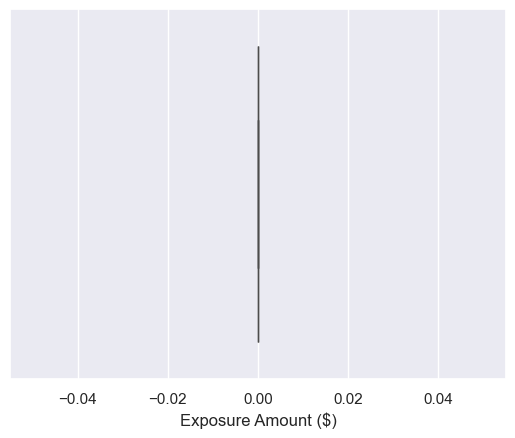

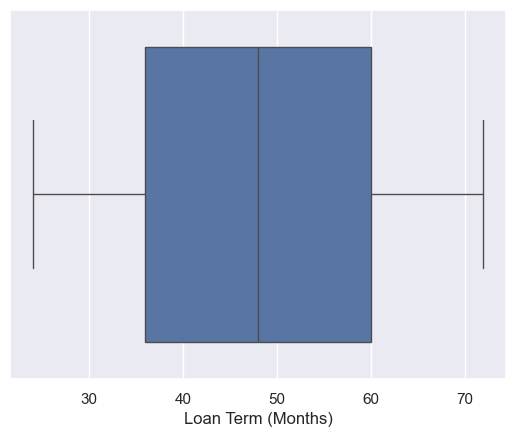

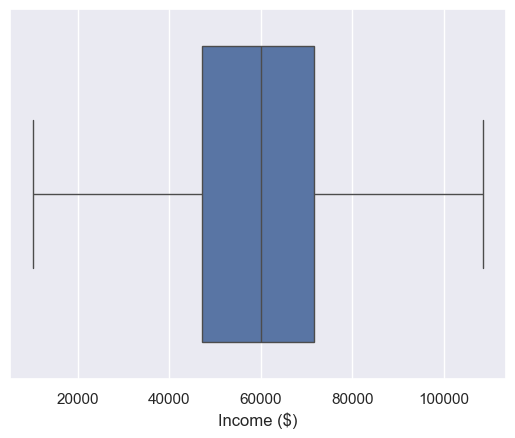

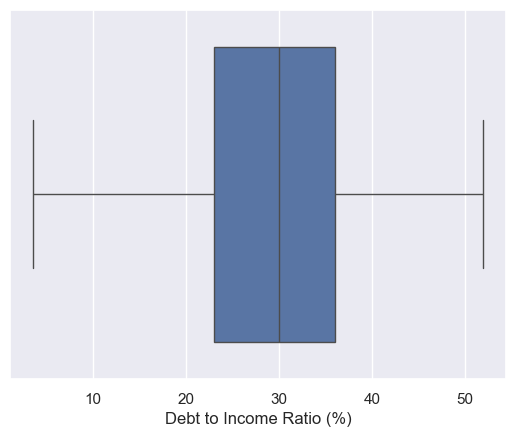

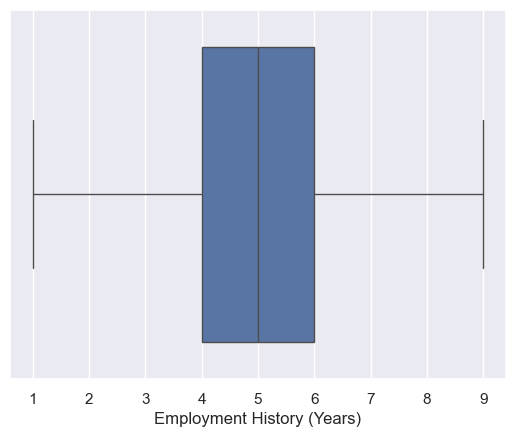

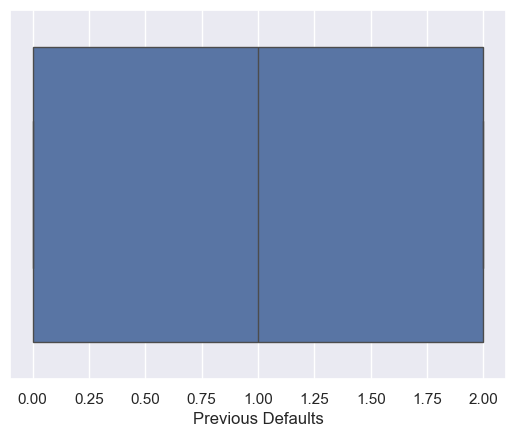

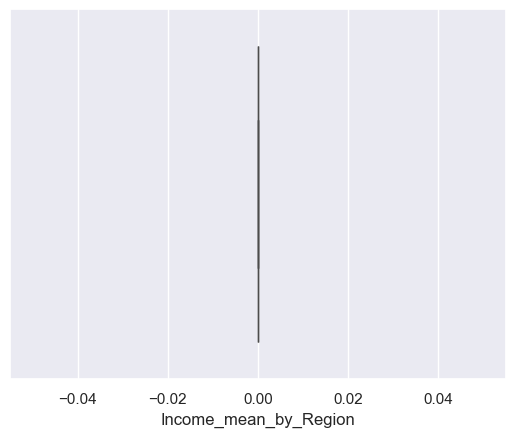

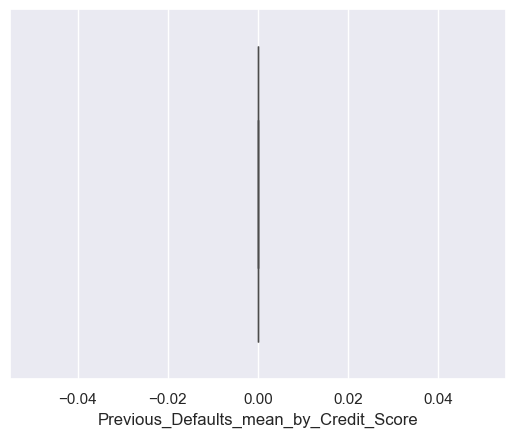

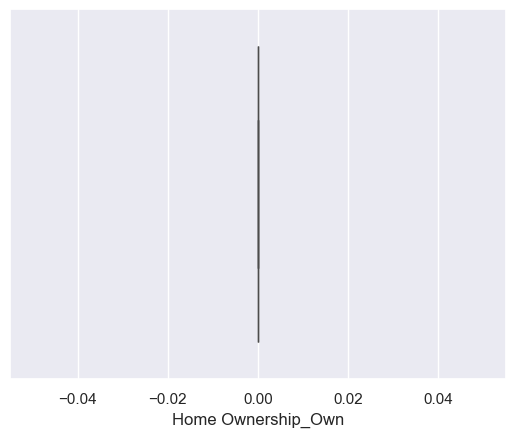

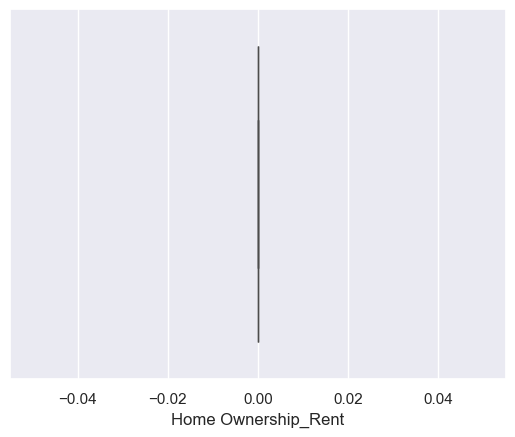

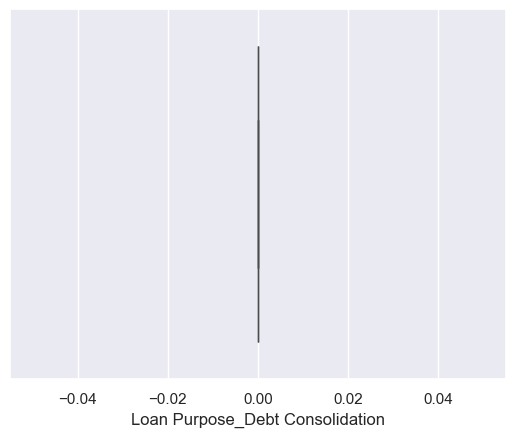

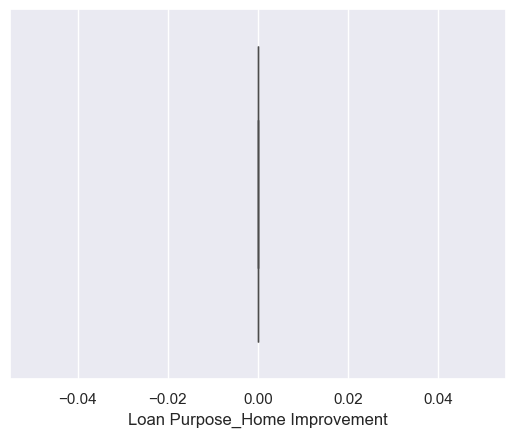

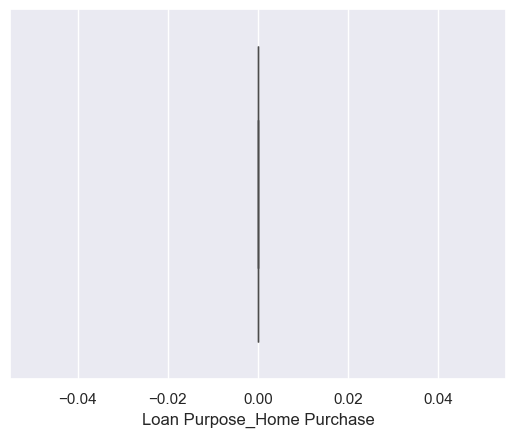

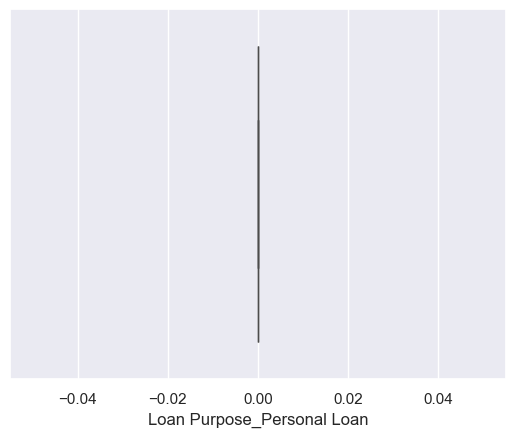

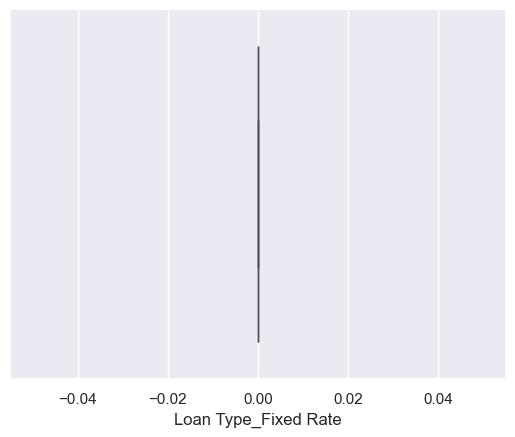

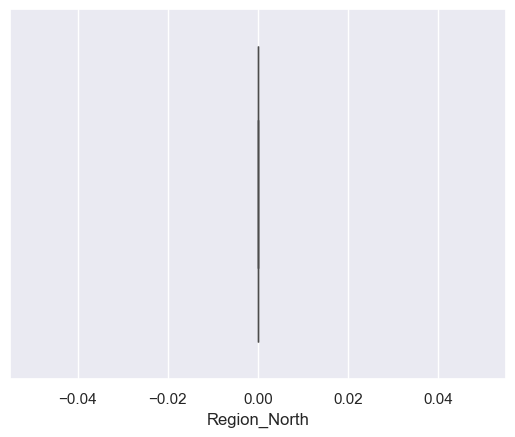

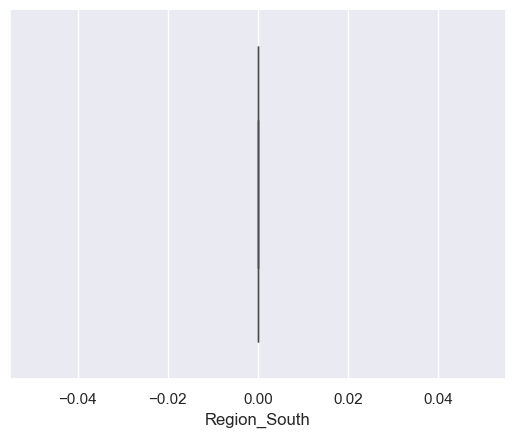

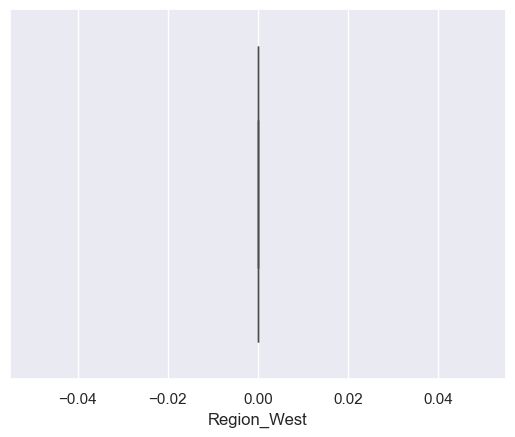

In [44]:
for i in df1.columns:
    if df1[i].dtype !=object:
        sns.boxplot(data=df1, x = i)
        plt.show()

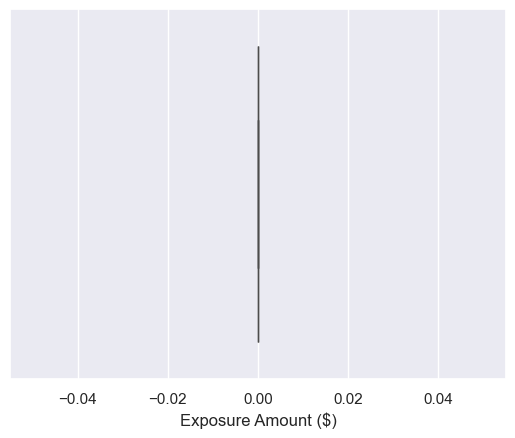

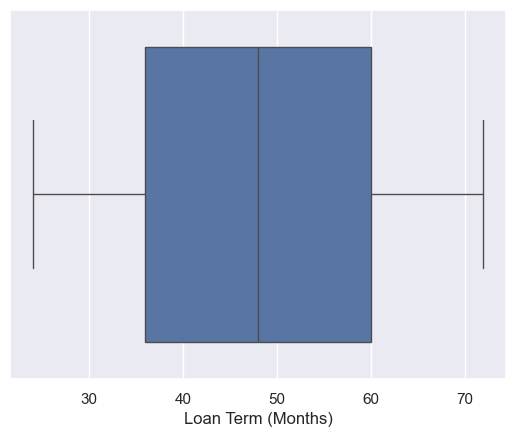

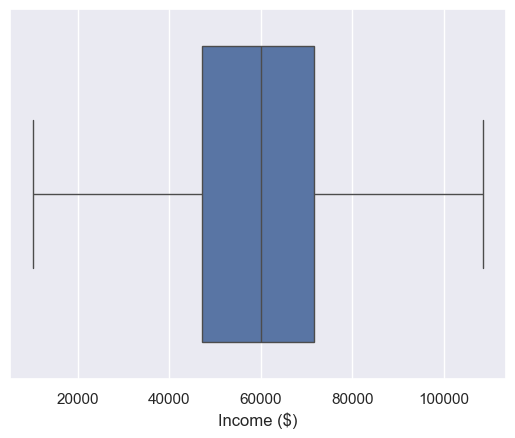

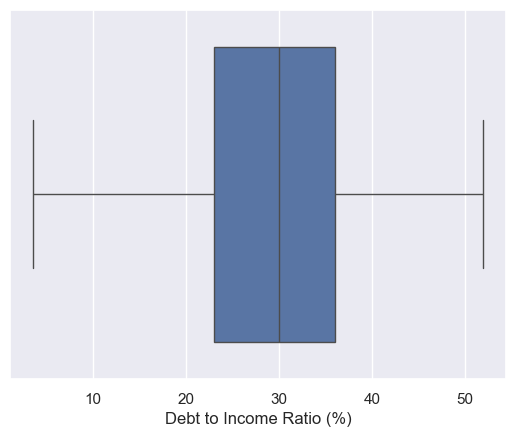

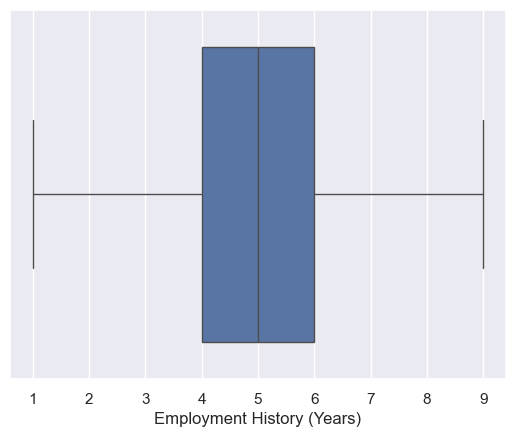

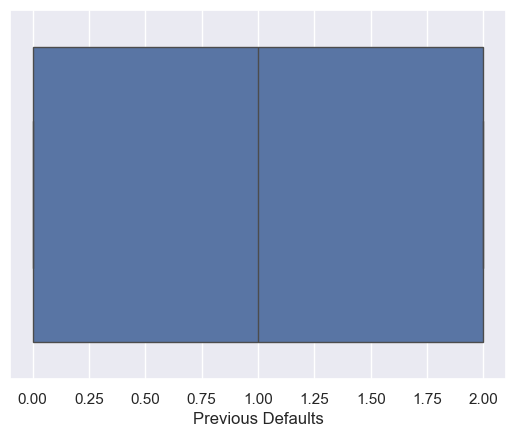

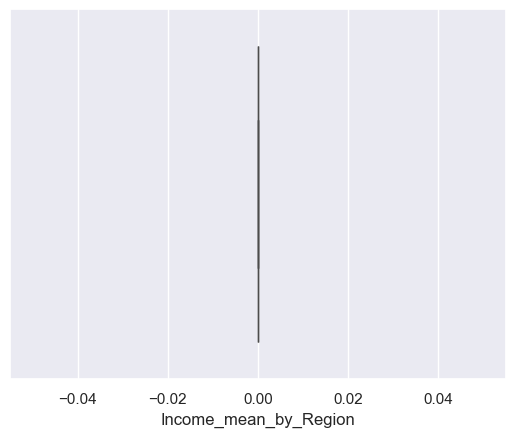

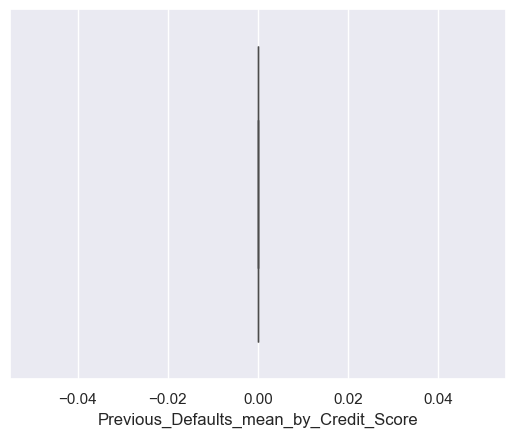

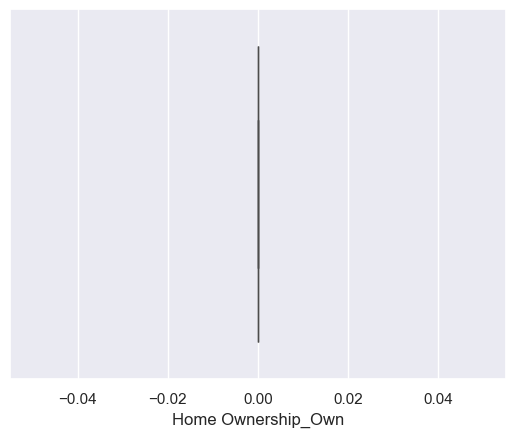

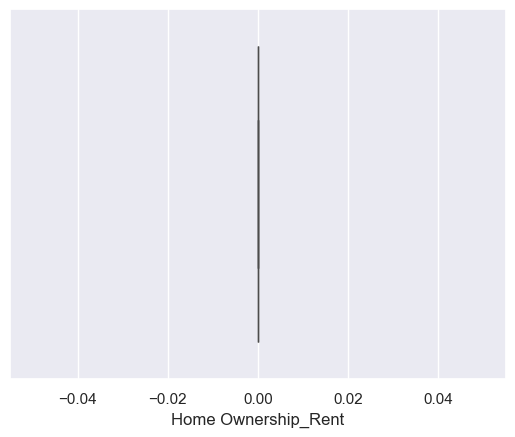

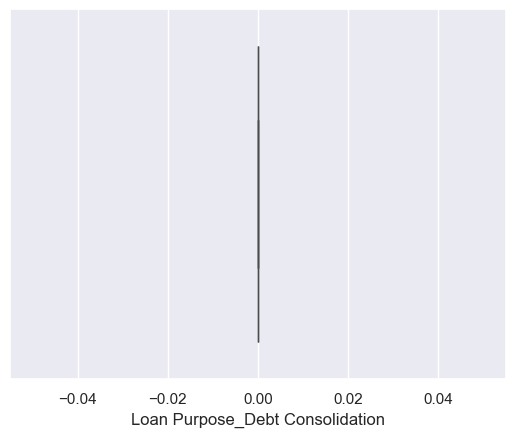

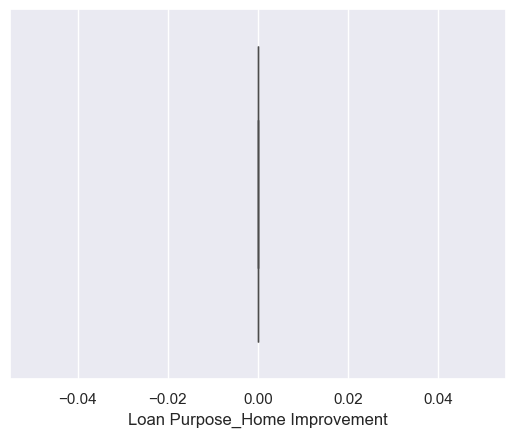

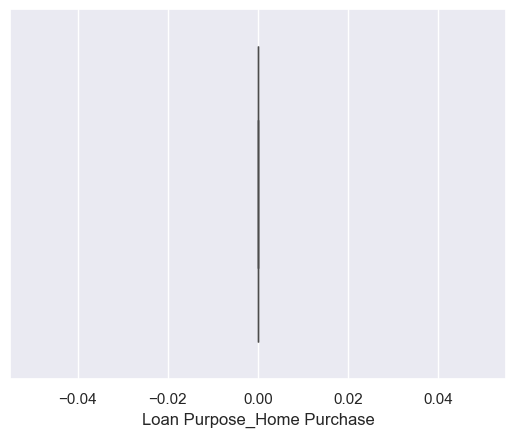

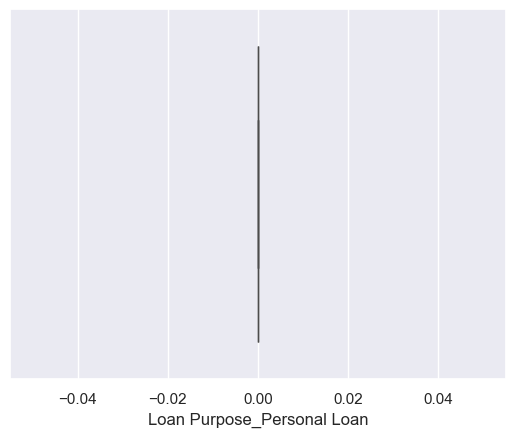

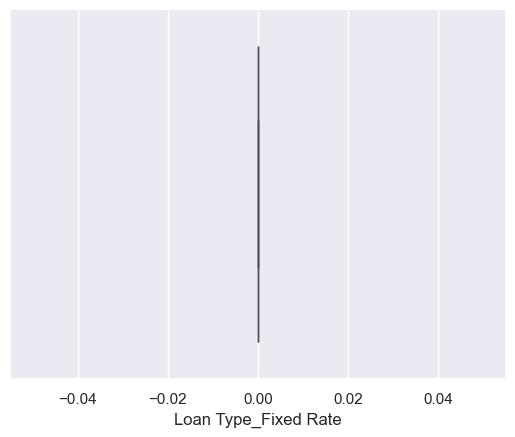

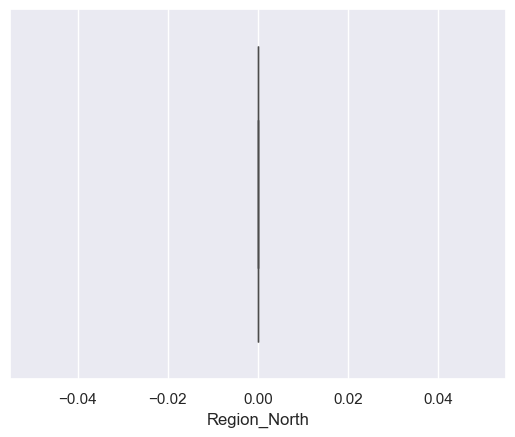

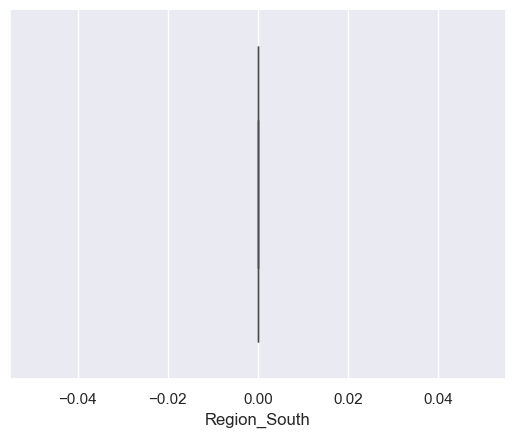

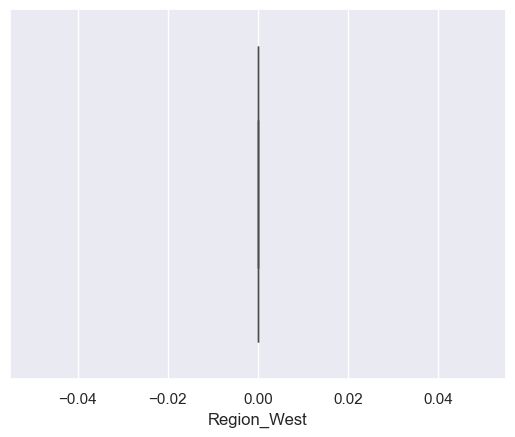

In [45]:
q1 = df1.quantile(0.25, numeric_only=True)
q3 = df1.quantile(0.75,numeric_only=True)
IQR = q3-q1
lower = q1-1.5*IQR
upper = q3+1.5*IQR

for i in df1.columns:
    if df1[i].dtypes!=object:
        df1[i] = np.where(df1[i] > upper[i],upper[i],df1[i])
        df1[i] = np.where(df1[i] < lower[i],lower[i],df1[i])
        sns.boxplot(data=df1,x=i)
        plt.show()

In [46]:
inputs_deploy_scaled = scaler.transform(df1)

data_deploy_scaled = pd.DataFrame(inputs_deploy_scaled, columns=df1.columns)

data_deploy_scaled

,Exposure Amount ($),Loan Term (Months),Income ($),Debt to Income Ratio (%),Employment History (Years),Previous Defaults,Income_mean_by_Region,Previous_Defaults_mean_by_Credit_Score,Home Ownership_Own,Home Ownership_Rent,Loan Purpose_Debt Consolidation,Loan Purpose_Home Improvement,Loan Purpose_Home Purchase,Loan Purpose_Personal Loan,Loan Type_Fixed Rate,Region_North,Region_South,Region_West
0,-3.027921,-0.700283,-0.118929,-0.713164,0.513114,0.001313,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
1,-3.027921,-0.700283,-1.139828,1.099158,1.028470,-1.220405,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
2,-3.027921,1.416336,-1.222269,1.602580,1.028470,0.001313,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
3,-3.027921,1.416336,-1.137758,-1.015217,-0.517597,1.223032,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
4,-3.027921,-0.700283,1.253242,-0.209741,-1.548309,-1.220405,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-3.027921,-1.405823,0.317561,-0.713164,-0.517597,0.001313,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
396,-3.027921,-0.700283,0.598305,0.797104,-0.002242,0.001313,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
397,-3.027921,1.416336,-1.585253,1.199842,-0.517597,-1.220405,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274
398,-3.027921,-1.405823,-0.211164,0.797104,-0.002242,-1.220405,-390.982648,-14.380071,-0.709601,-0.710557,-0.501484,-0.502772,-0.493154,-0.496208,-0.991982,-0.583701,-0.575772,-0.578274


In [47]:
inputs.columns

Index(['Employment History (Years)', 'Previous Defaults', 'Loan Term (Months)',
       'Debt to Income Ratio (%)', 'Income ($)'],
      dtype='object')

In [54]:
df_dep=data_deploy_scaled[['Exposure Amount ($)', 'Income ($)', 'Debt to Income Ratio (%)',
       'Loan Term (Months)', 'Previous Defaults',
       'Employment History (Years)']]

df_dep

,Exposure Amount ($),Income ($),Debt to Income Ratio (%),Loan Term (Months),Previous Defaults,Employment History (Years)
0,-3.027921,-0.118929,-0.713164,-0.700283,0.001313,0.513114
1,-3.027921,-1.139828,1.099158,-0.700283,-1.220405,1.028470
2,-3.027921,-1.222269,1.602580,1.416336,0.001313,1.028470
3,-3.027921,-1.137758,-1.015217,1.416336,1.223032,-0.517597
4,-3.027921,1.253242,-0.209741,-0.700283,-1.220405,-1.548309
...,...,...,...,...,...,...
395,-3.027921,0.317561,-0.713164,-1.405823,0.001313,-0.517597
396,-3.027921,0.598305,0.797104,-0.700283,0.001313,-0.002242
397,-3.027921,-1.585253,1.199842,1.416336,-1.220405,-0.517597
398,-3.027921,-0.211164,0.797104,-1.405823,-1.220405,-0.002242


In [57]:
model_features=['Employment History (Years)', 'Previous Defaults', 
                  'Loan Term (Months)', 'Debt to Income Ratio (%)', 'Income ($)']
df_dep['predicted_lgd'] = reg.predict(df_dep[model_features])

df_dep

C:\Users\User\AppData\Local\Temp\ipykernel_9652\1738853766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep['predicted_lgd'] = reg.predict(df_dep[model_features])


,Exposure Amount ($),Income ($),Debt to Income Ratio (%),Loan Term (Months),Previous Defaults,Employment History (Years),predicted_lgd
0,-3.027921,-0.118929,-0.713164,-0.700283,0.001313,0.513114,0.171828
1,-3.027921,-1.139828,1.099158,-0.700283,-1.220405,1.028470,0.154351
2,-3.027921,-1.222269,1.602580,1.416336,0.001313,1.028470,0.547162
3,-3.027921,-1.137758,-1.015217,1.416336,1.223032,-0.517597,0.286047
4,-3.027921,1.253242,-0.209741,-0.700283,-1.220405,-1.548309,0.199830
...,...,...,...,...,...,...,...
395,-3.027921,0.317561,-0.713164,-1.405823,0.001313,-0.517597,0.094328
396,-3.027921,0.598305,0.797104,-0.700283,0.001313,-0.002242,0.411797
397,-3.027921,-1.585253,1.199842,1.416336,-1.220405,-0.517597,0.259849
398,-3.027921,-0.211164,0.797104,-1.405823,-1.220405,-0.002242,0.112172
